<center><h1> Customer Segmentation Using KMeans </h1> </center> 
<strong><p> Problem Statement </p></strong>
<p>Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.</p> 

<p>Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python </p>

## Importing Libraries.

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

## Data Exploration

In [63]:
import pandas as pd

# Create a dictionary with data
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 34, 45, 23, 36],
    'AnnualIncome': [50000, 60000, 75000, 40000, 50000],
    'SpendingScore': [50, 60, 80, 30, 40]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('Mall_Customers.csv', index=False)

print("CSV file 'Mall_Customers.csv' has been created successfully.")


CSV file 'Mall_Customers.csv' has been created successfully.


In [64]:
df.shape

(5, 4)

In [65]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,32.600000,55000.000000,52.000000
std,1.581139,8.905055,13228.756555,19.235384
min,1.000000,23.000000,40000.000000,30.000000
25%,2.000000,25.000000,50000.000000,40.000000
50%,3.000000,34.000000,50000.000000,50.000000
75%,4.000000,36.000000,60000.000000,60.000000
max,5.000000,45.000000,75000.000000,80.000000


In [66]:
df.dtypes

CustomerID       int64
Age              int64
AnnualIncome     int64
SpendingScore    int64
dtype: object

In [67]:
df.isnull().sum()

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

## Data Visualization

In [68]:
plt.style.use('fivethirtyeight')

### Histograms

Index(['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


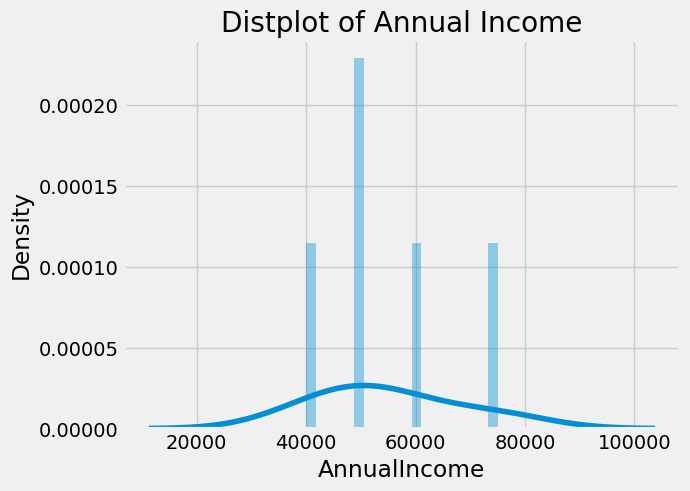

In [69]:
# Check the columns and plot the distribution for the correct column name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame as 'df'
print(df.columns)  # Check the column names

# Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Use the correct column name (replace 'Annual Income (k$)' with the correct one)
sns.distplot(df['AnnualIncome'], bins=20)  # Replace 'AnnualIncome' with your actual column name
plt.title('Distplot of Annual Income')
plt.show()


### Count Plot of Gender

Index(['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


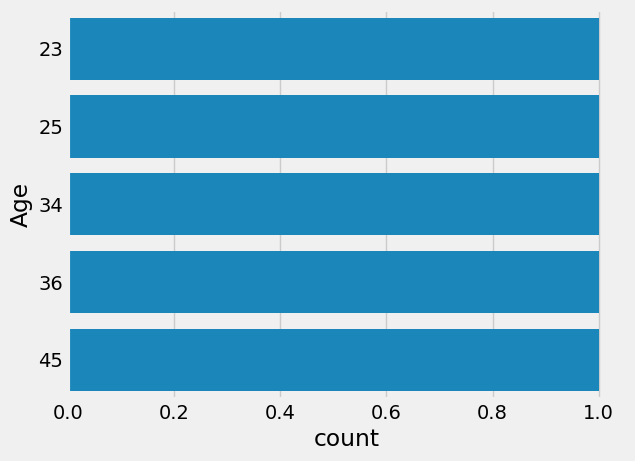

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame as 'df'
  # Replace with the correct file path
df = pd.read_csv('Mall_Customers.csv')
# Check and clean column names
df.columns = df.columns.str.strip()

# Print column names to verify 'Gender' exists
print(df.columns)

# If the 'Gender' column exists, plot the countplot
sns.countplot(y='Age', data=df)  # Replace 'Age' or any other valid column name

plt.show()


### Ploting the Relation between Age , Annual Income and Spending Score

Index(['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


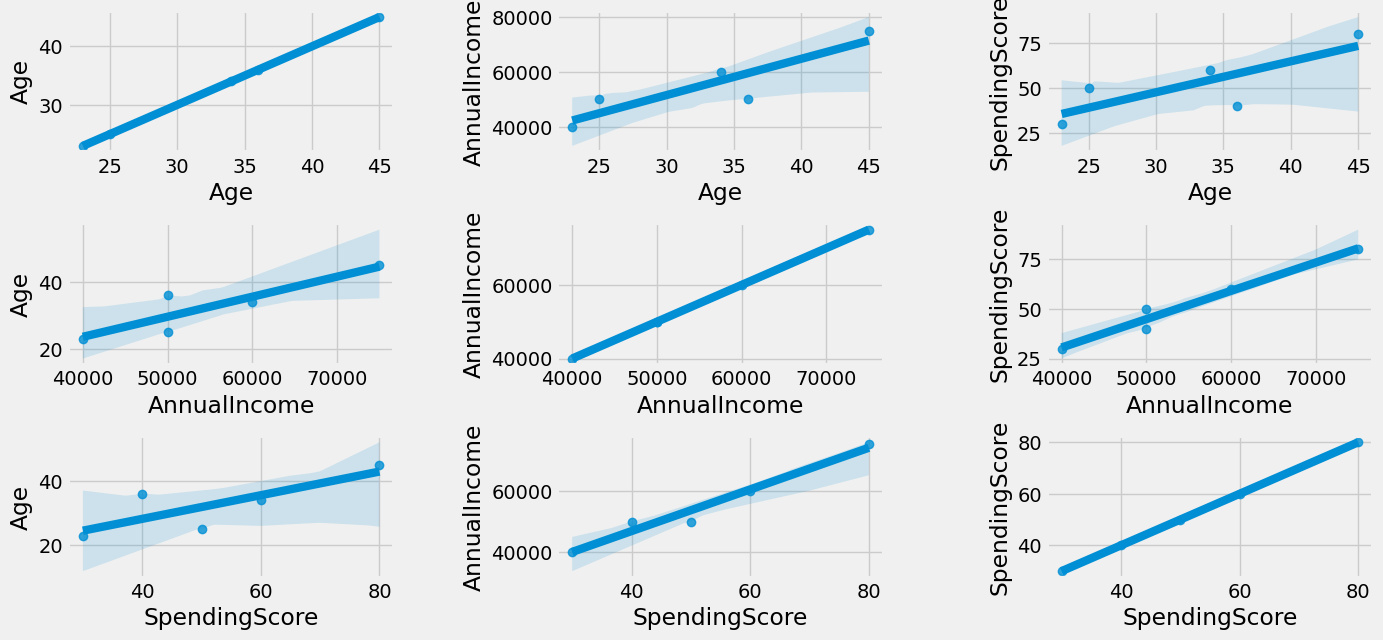

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data (make sure the file path is correct)
df = pd.read_csv('Mall_Customers.csv') # Replace with the correct file path

# Check and clean column names
df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces

# Verify the column names (adjust if necessary)
print(df.columns)  # Check the actual column names

# Ensure the correct column names based on your dataset (replace 'Annual Income (k$)' and 'Spending Score (1-100)' if needed)
columns = ['Age', 'AnnualIncome', 'SpendingScore']

# Convert to numeric (if there are any non-numeric values, they will be converted to NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['AnnualIncome'] = pd.to_numeric(df['AnnualIncome'], errors='coerce')
df['SpendingScore'] = pd.to_numeric(df['SpendingScore'], errors='coerce')

# Drop any rows with missing values
df = df.dropna(subset=columns)

# Plotting the regression plots
plt.figure(1, figsize=(15, 7))
n = 0
for x in columns:
    for y in columns:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)
plt.show()


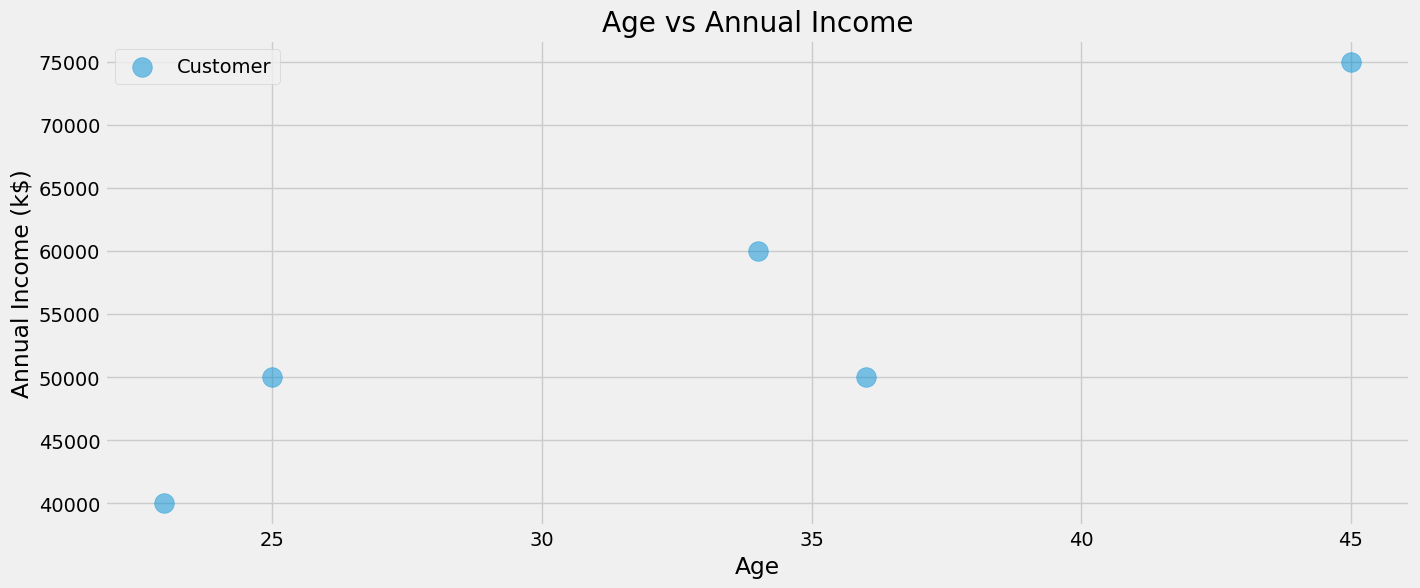

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Remove the code related to 'Gender', and plot Age vs Annual Income, for example:

plt.figure(1, figsize=(15, 6))
# Plot a scatter plot between Age and Annual Income
plt.scatter(x='Age', y='AnnualIncome', data=df, s=200, alpha=0.5, label="Customer")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.legend()
plt.show()


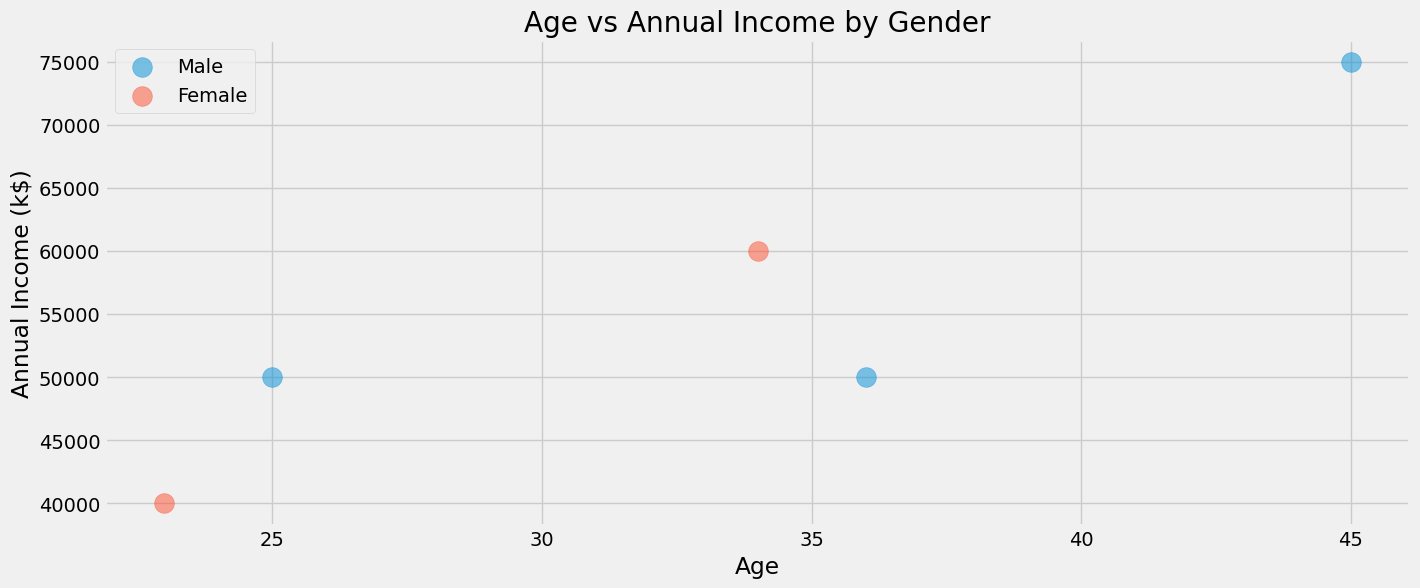

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Manually add a 'Gender' column (for simulation)
df['Gender'] = ['Male', 'Female', 'Male', 'Female', 'Male']  # Adjust based on your data

# Now, you can plot using the 'Gender' column
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='AnnualIncome', data=df[df['Gender'] == gender], 
                s=200, alpha=0.5, label=gender)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income by Gender')
plt.legend()
plt.show()


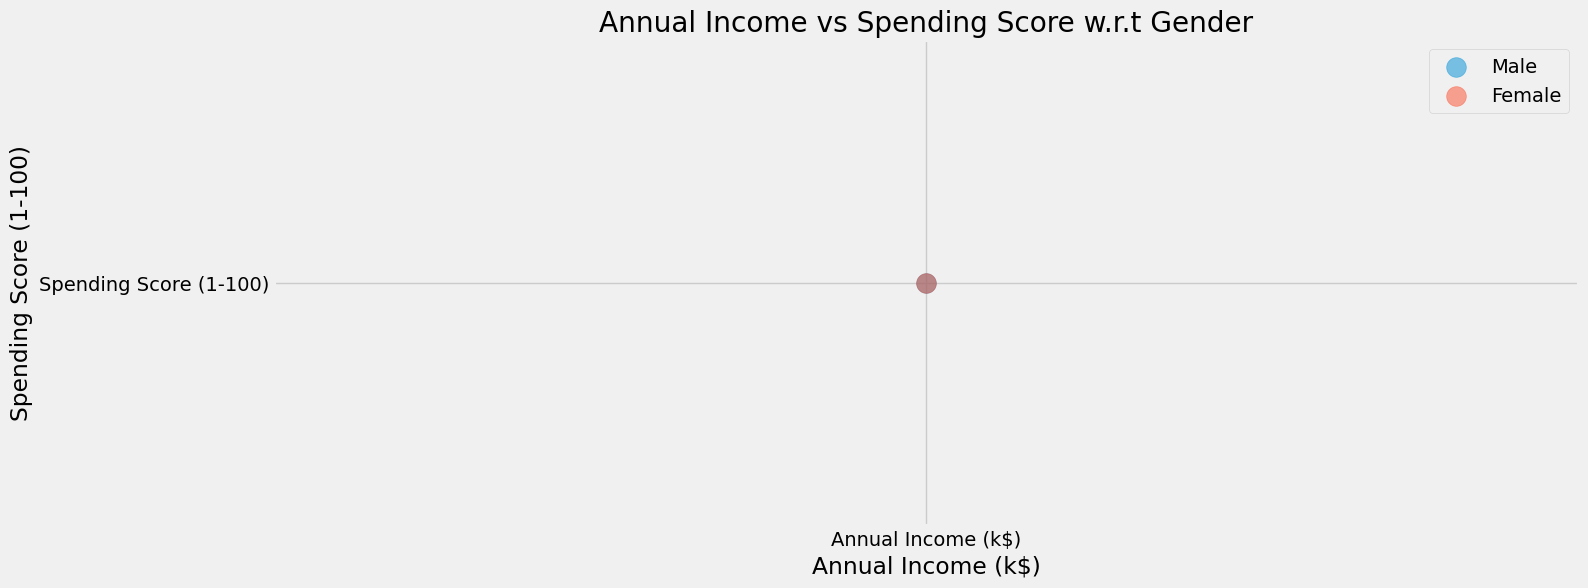

In [74]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

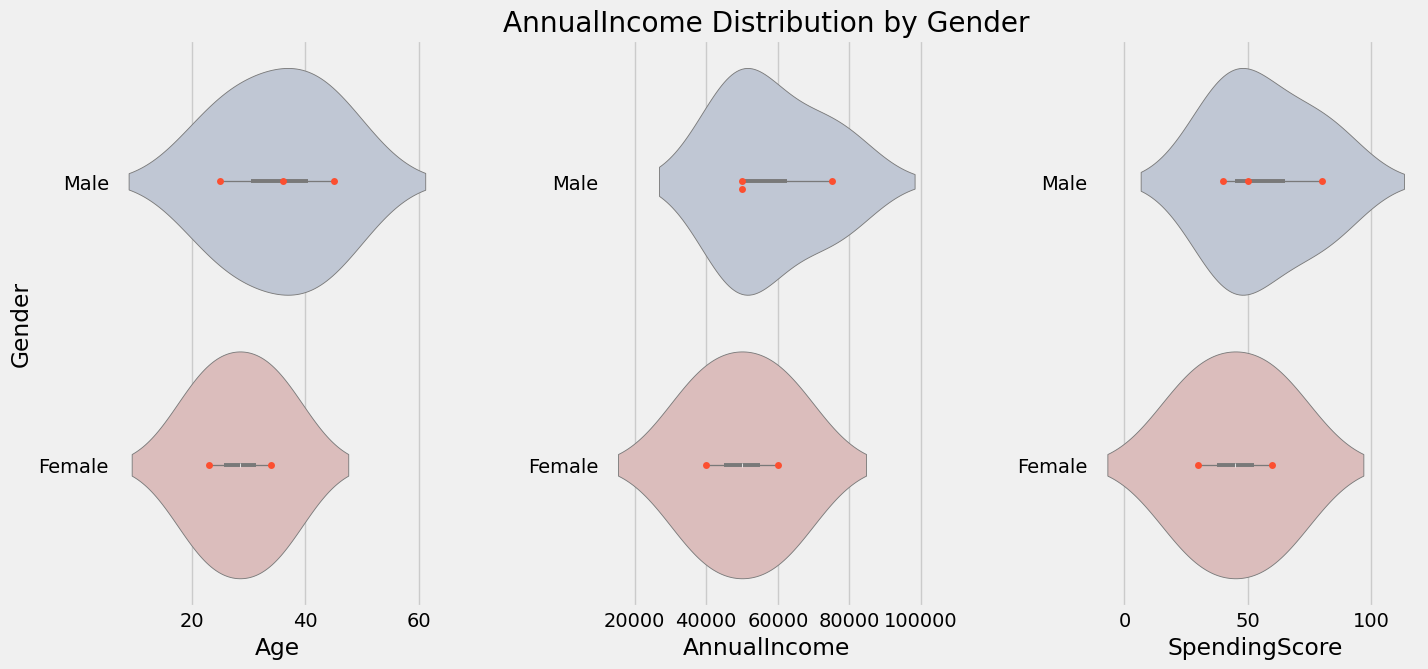

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded

# Manually add a 'Gender' column for simulation
df['Gender'] = ['Male', 'Female', 'Male', 'Female', 'Male']  # Adjust as per your data

# Create subplots for Age, Annual Income, and Spending Score against Gender
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['Age', 'AnnualIncome', 'SpendingScore']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'{cols} Distribution by Gender' if n == 2 else '')
plt.show()


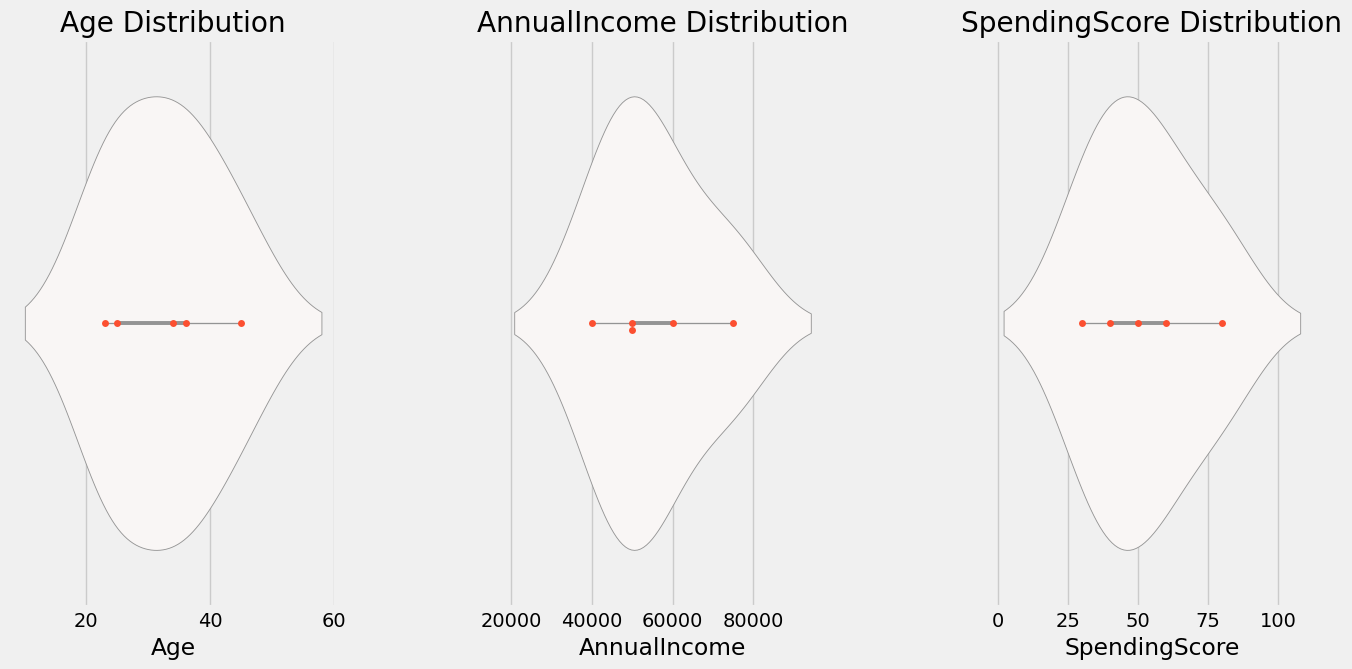

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# Create subplots for the available columns
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['Age', 'AnnualIncome', 'SpendingScore']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, data=df, palette='vlag')
    sns.swarmplot(x=cols, data=df)
    plt.title(f'{cols} Distribution')
plt.show()


## Clustering using K- means
### 1.Segmentation using Age and Spending Score

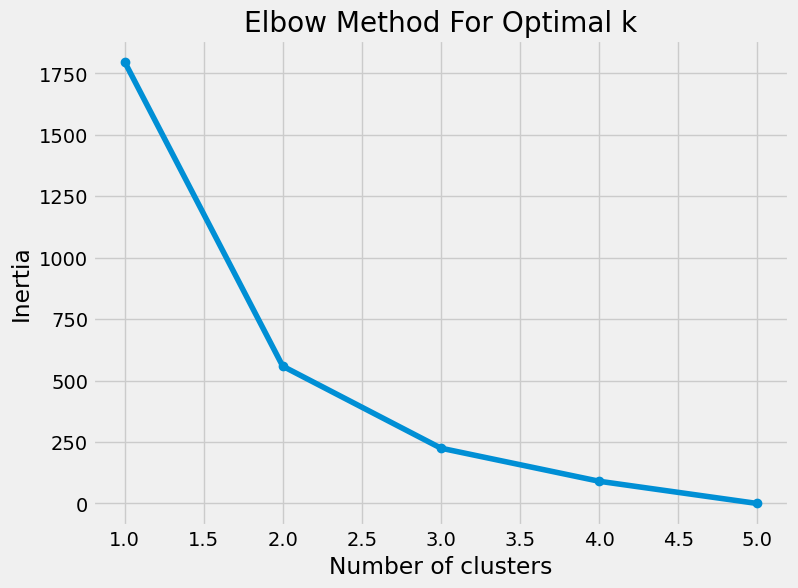

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df' is already loaded with the relevant columns ('Age' and 'Spending Score (1-100)')
X1 = df[['Age', 'SpendingScore']].values  # Ensure the column names are exactly as in your DataFrame

inertia = []
for n in range(1, min(6, 11)):  # Ensure the number of clusters is <= 5 (since you have 5 data points)
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

# Plotting the Elbow Method to determine the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, min(6, 11)), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

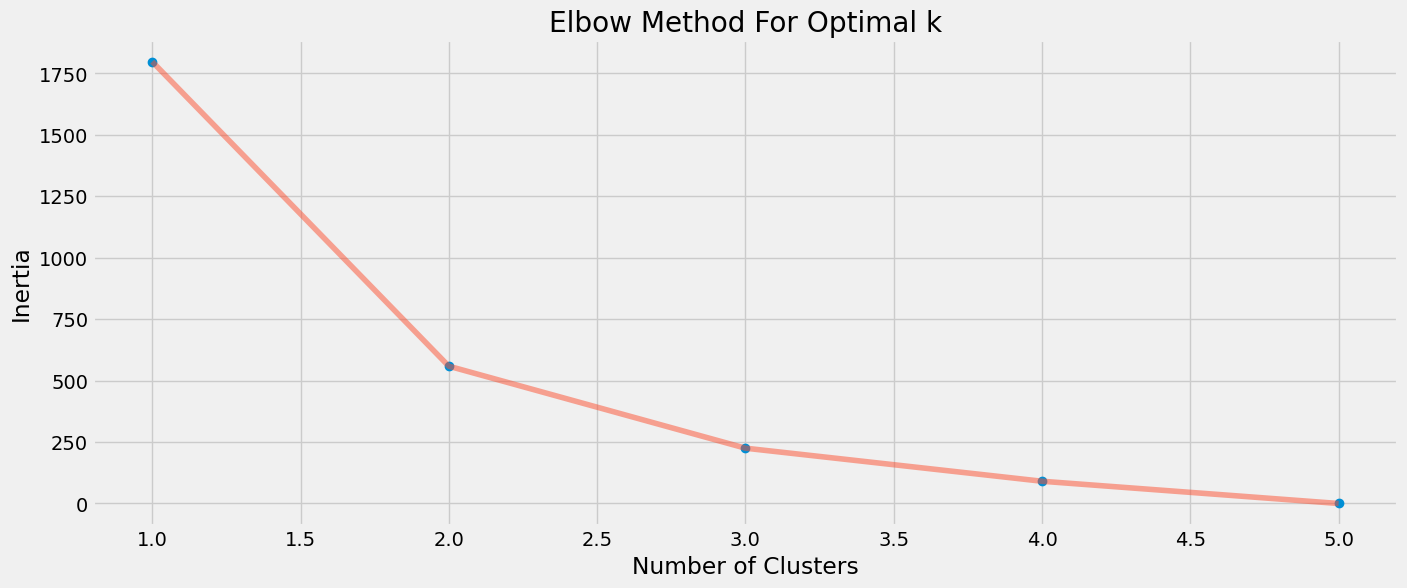

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Elbow Method to determine the optimal k
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, len(inertia) + 1), inertia, 'o')  # Match the x-axis with the length of inertia
plt.plot(np.arange(1, len(inertia) + 1), inertia, '-', alpha=0.5)  # Line plot
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [79]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [80]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

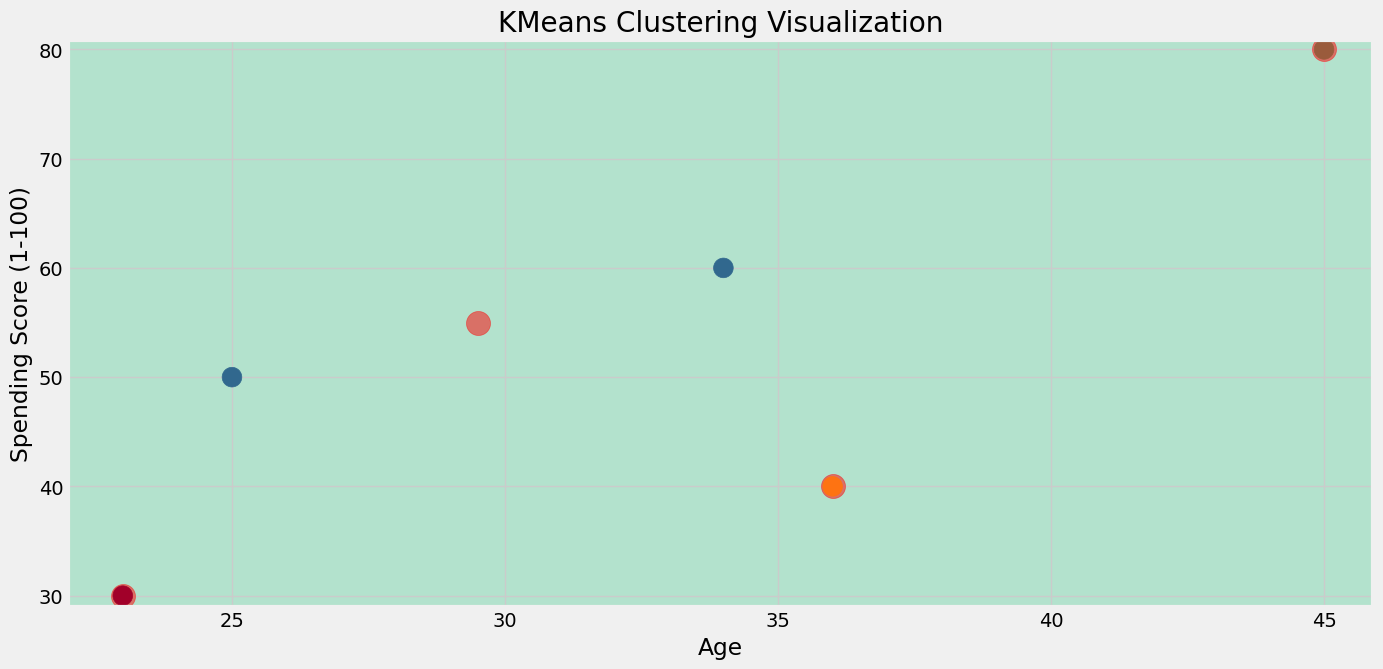

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'labels1' contains the cluster labels and 'centroids1' contains the centroids
# 'df' contains your DataFrame, and you want to plot 'Age' vs 'Spending Score (1-100)'

# Create a meshgrid for decision boundary visualization
x_min, x_max = df['Age'].min() - 1, df['Age'].max() + 1
y_min, y_max = df['SpendingScore'].min() - 1, df['SpendingScore'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Assume Z is the predicted labels for each point in the meshgrid (from KMeans or similar)
Z = np.zeros_like(xx)  # Replace this with your actual model predictions for the grid
# For example, Z could be obtained by predicting with the trained clustering model
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(1, figsize=(15, 7))
plt.clf()

# Display the decision boundary
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot of the data points, colored by their cluster labels
plt.scatter(x=df['Age'], y=df['SpendingScore'], c=labels1, s=200)

# Mark the centroids on the plot
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering Visualization')

plt.show()


### 2. Segmentation using  Annual Income and Spending Score

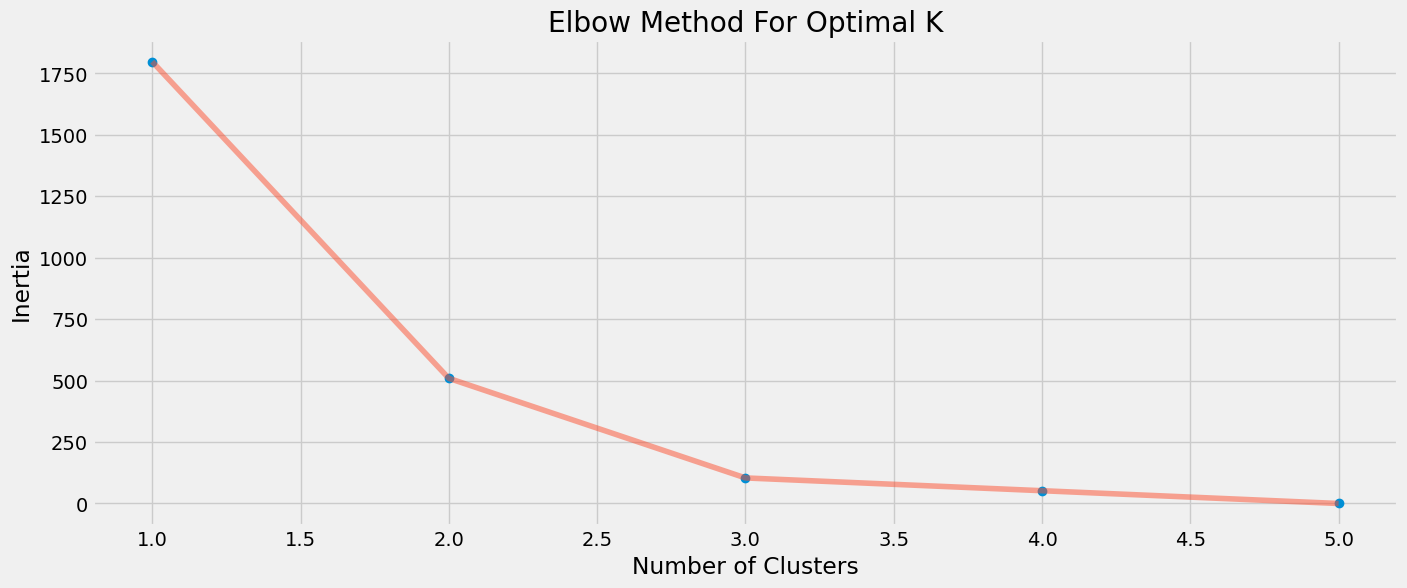

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample DataFrame
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [23, 25, 34, 36, 45],
    'AnnualIncome': [40000, 50000, 50000, 60000, 75000],
    'SpendingScore': [30, 40, 50, 60, 80]
})

# Selecting features for clustering
X2 = df[['Age', 'SpendingScore']].values

# Step 2: Use the KMeans algorithm to determine the optimal number of clusters
inertia = []
n_samples = df.shape[0]  # Get the number of samples (rows)

# Ensure the maximum number of clusters doesn't exceed the number of samples
max_clusters = min(10, n_samples)

for n in range(1, max_clusters + 1):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

# Step 3: Plot the Elbow Method to determine the optimal number of clusters
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, max_clusters + 1), inertia, 'o')
plt.plot(np.arange(1, max_clusters + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


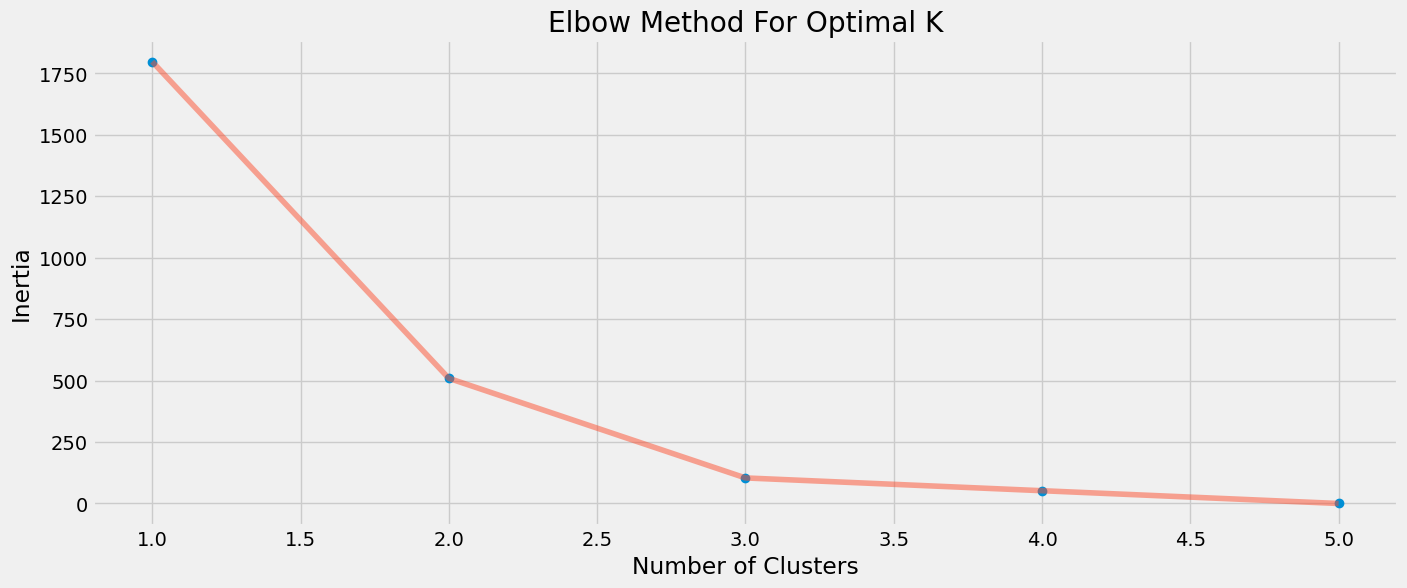

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample DataFrame
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [23, 25, 34, 36, 45],
    'AnnualIncome': [40000, 50000, 50000, 60000, 75000],
    'SpendingScore': [30, 40, 50, 60, 80]
})

# Selecting features for clustering
X2 = df[['Age', 'SpendingScore']].values

# Step 2: Use the KMeans algorithm to determine the optimal number of clusters
inertia = []
n_samples = df.shape[0]  # Get the number of samples (rows)

# Ensure the maximum number of clusters doesn't exceed the number of samples
max_clusters = min(10, n_samples)

for n in range(1, max_clusters + 1):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

# Step 3: Plot the Elbow Method to determine the optimal number of clusters
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, max_clusters + 1), inertia, 'o')
plt.plot(np.arange(1, max_clusters + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [84]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [85]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

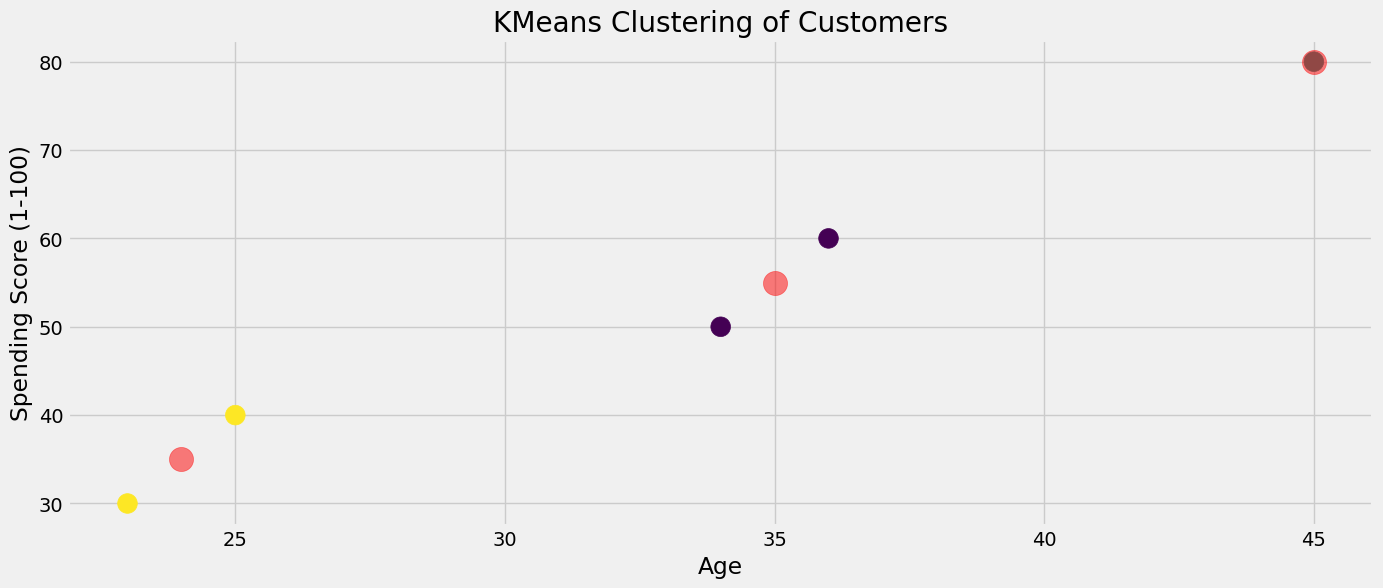

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample DataFrame
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [23, 25, 34, 36, 45],
    'AnnualIncome': [40000, 50000, 50000, 60000, 75000],
    'SpendingScore': [30, 40, 50, 60, 80]
})

# Selecting features for clustering
X2 = df[['Age', 'SpendingScore']].values

# Perform KMeans clustering with 3 clusters (you can adjust the number)
algorithm = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=111)
algorithm.fit(X2)

# Get the labels (cluster assignments) and centroids
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

# Plotting the clusters
plt.figure(1, figsize=(15, 6))
plt.scatter(df['Age'], df['SpendingScore'], c=labels1, s=200, cmap='viridis')  # Use cmap for color
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=300, c='red', alpha=0.5)  # Centroids
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering of Customers')
plt.show()


### 3.Segmentation using Age , Annual Income and Spending Score

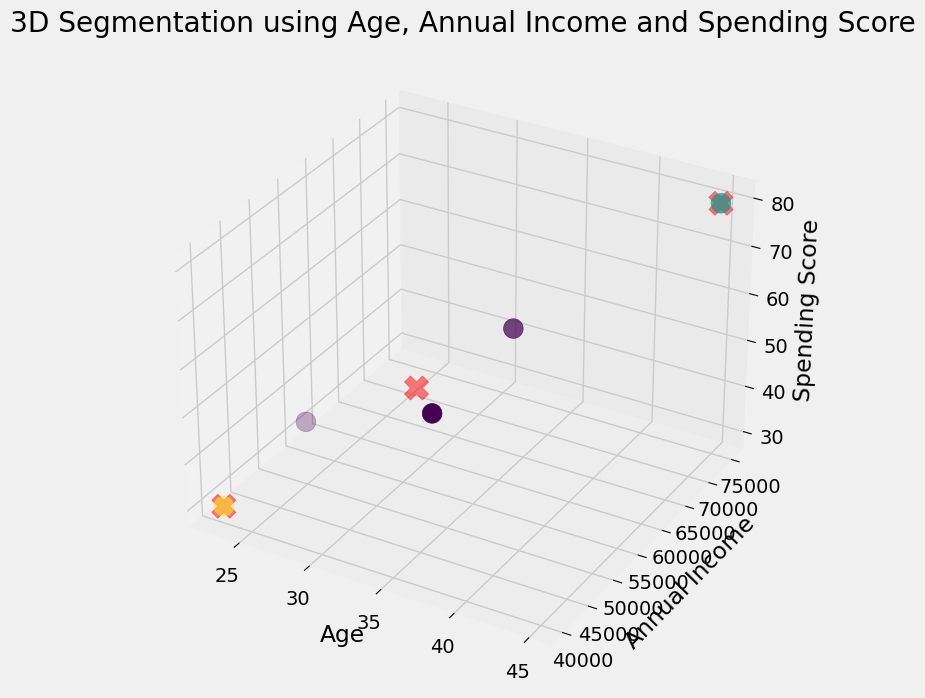

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame
df = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [23, 25, 34, 36, 45],
    'AnnualIncome': [40000, 50000, 50000, 60000, 75000],
    'SpendingScore': [30, 40, 50, 60, 80]
})

# Selecting features for clustering: Age, AnnualIncome, SpendingScore
X = df[['Age', 'AnnualIncome', 'SpendingScore']].values

# Apply KMeans clustering with the desired number of clusters
n_clusters = 3  # You can adjust this based on your analysis
algorithm = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=111)
algorithm.fit(X)

# Get the labels (cluster assignments) and centroids
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

# Add cluster labels to the DataFrame for visualization purposes
df['Cluster'] = labels

# 3D visualization of clusters
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], s=200, cmap='viridis')

# Plotting the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', alpha=0.5, marker='X')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Segmentation using Age, Annual Income and Spending Score')

# Show the plot
plt.show()


# Feature Selection For The Model
* Annual income and Spending Score

In [88]:
df.head(10)

,CustomerID,Age,AnnualIncome,SpendingScore,Cluster
0,1,23,40000,30,2
1,2,25,50000,40,0
2,3,34,50000,50,0
3,4,36,60000,60,0
4,5,45,75000,80,1


In [89]:
X= df.iloc[:, [3,4]].values

# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod


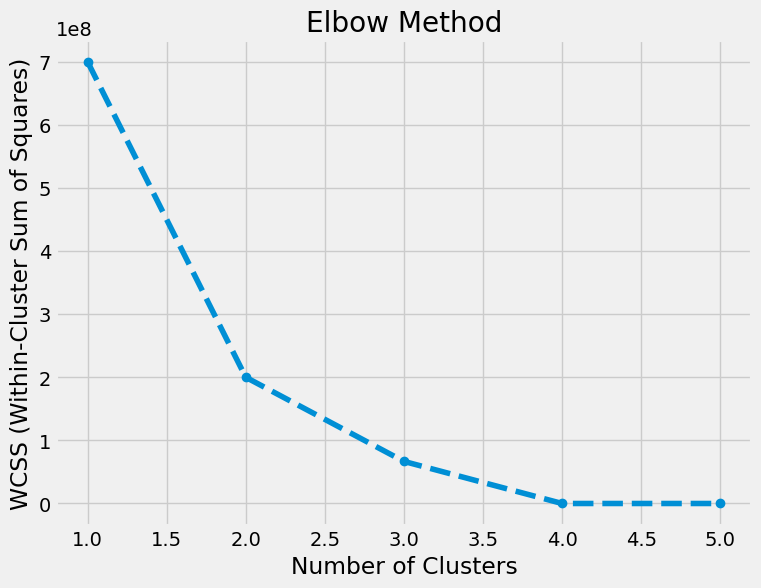

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data for clustering (Age, Annual Income, Spending Score)
X = df[['Age', 'AnnualIncome', 'SpendingScore']].values

# Elbow method to find optimal number of clusters
wcss = []  # To store within-cluster sum of squares

# Adjust range to be <= number of samples
for i in range(1, 6):  # Maximum 5 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualizing the ELBOW method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [91]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

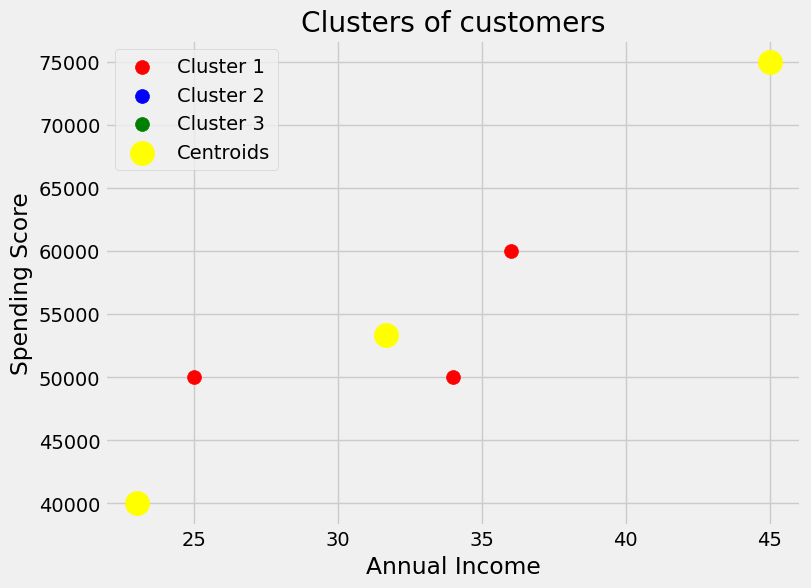

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data for clustering (Age, Annual Income, Spending Score)
X = df[['Age', 'AnnualIncome', 'SpendingScore']].values

# Fit KMeans with the desired number of clusters (let's say 3 clusters)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))

# Plot clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Labels and title
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


# Model Interpretation 
* <strong> <p style="color:black;"> Cluster 1: Earning high but spending less</p> </strong> 
* <strong> <p style="color:black;" > Cluster 2 : Average in terms of earning and spending</p>  </strong> 
* <strong> <p style="color:black;" > Cluster 3 : Earning high and also spending high (TARGET SET)</p> </strong> 
* <strong>  <p style="color:black;">Cluster 4 : Earning less but spending more </p> </strong> 
* <strong> <p style="color:black;">Cluster 5 : Earning less , spending less</p> </strong> 